In [2]:
# step 1: import needed packages
import pandas as pd
import itertools
import numpy as np

In [3]:

#HIER DE PARAMETERS INSTELLEN

#VOOR DE MERGING
    # === 2. Thresholds apart instellen ===
std_dev_threshold_size = 1
std_dev_threshold_product = 1
std_dev_threshold_channel = 1
distance_threshold_channel = 20000000  # <<< max afstand in kilometers

    # === 3. Full Connection optie ===
full_connection = True  # <<< ZET OP False als je GEEN volledige onderlinge verbindingen wilt

# dit is voor de visualisatie staat nu op hetzelfde als de merge tresholds
std_dev_threshold_product_network_visualisation = std_dev_threshold_product  # hier kun je mee spelen
std_dev_threshold_channel_network_visualisation=std_dev_threshold_channel
std_dev_threshold_size_network_visualisation=std_dev_threshold_size


YOUR_PERSONAL_PATH = "/Users/biekeleenknegt/Documents/Github/SCM_GW" #pas dit hier aan!!!!!

In [4]:
# step 2 data aggregation analysis DIT MOET JE 3 KEER DOEN DUS DE ITEM RESEARCHED TELKENS AANPASSEN

In [5]:

# === Instellingen ===HIER AANPASSEN!!!!!!!!
excel_path = f"{YOUR_PERSONAL_PATH}/Real Demandan.xlsx"
sheet_name = "channel_data"  # of pas her aan naar channel_data/size_data/product_data


# === Data inladen ===
df = pd.read_excel(excel_path, sheet_name=sheet_name)
df.set_index(df.columns[0], inplace=True)  # zet 'Rijlabels' als index
df = df.apply(pd.to_numeric, errors='coerce')  # zorg dat alles numeriek is

# === Combinaties maken ===
tobecombined = df.index.tolist()
columns = df.columns.tolist()
combinations = list(itertools.combinations(tobecombined, 2))

# === Bereken MPE ===
results = []

for factor1, factor2 in combinations:
    diffs = (df.loc[factor1] - df.loc[factor2]) / df.loc[factor2]

    row = {
        'Percetage difference': f'{factor1} vs {factor2}',
        **diffs.to_dict(),
        
    }
    results.append(row)

# === Dataframe maken ===
result_df = pd.DataFrame(results)
result_df.set_index('Percetage difference', inplace=True)

# === Naar Excel schrijven (optioneel) ===
result_df.to_excel("channel_mpe_analysis.xlsx")

# === Output tonen ===
print("channel MPE Analysis")
print(result_df)
# === Stap 5: Zet resultaat in DataFrame en schrijf weg naar Excel ===
result_df = pd.DataFrame(results)
result_df.set_index('Percetage difference', inplace=True)

output_path = f"{YOUR_PERSONAL_PATH}/channel_mpe_analysis.xlsx"
result_df.to_excel(output_path)

print(f"Results saved: {output_path}")


channel MPE Analysis
                             2019      2020      2021      2022      2023  \
Percetage difference                                                        
Amsterdam vs Berlin     -0.106087 -0.009740 -0.017323 -0.050143  0.030429   
Amsterdam vs Brussels   -0.368550 -0.239401 -0.295711 -0.280130 -0.327010   
Amsterdam vs Copenhagen -0.625910 -0.568294 -0.532234 -0.526090 -0.500000   
Amsterdam vs Helsinki   -0.565878 -0.540317 -0.582609 -0.562953 -0.508575   
Amsterdam vs Madrid     -0.399533 -0.406615 -0.312775 -0.365550 -0.233539   
Amsterdam vs Paris      -0.260432 -0.109489 -0.048780 -0.238806 -0.198062   
Amsterdam vs Platform    0.250608  0.389522  0.686486  0.857143  1.104520   
Amsterdam vs Rome        0.552870  1.140351  0.890909  1.033742  0.886076   
Amsterdam vs Stockholm  -0.600622 -0.546805 -0.531532 -0.600121 -0.550392   
Amsterdam vs Webshop    -0.796274 -0.765204 -0.783859 -0.774643 -0.730366   
Berlin vs Brussels      -0.293612 -0.231920 -0.283296 -

In [6]:

# === Instellingen ===HIER AANPASSEN!!!!!!!!
excel_path = f"{YOUR_PERSONAL_PATH}/Real Demandan.xlsx"
sheet_name = f"size_data"  # of pas her aan naar channel_data/size_data/product_data


# === Data inladen ===
df = pd.read_excel(excel_path, sheet_name=sheet_name)
df.set_index(df.columns[0], inplace=True)  # zet 'Rijlabels' als index
df = df.apply(pd.to_numeric, errors='coerce')  # zorg dat alles numeriek is

# === Combinaties maken ===
tobecombined = df.index.tolist()
columns = df.columns.tolist()
combinations = list(itertools.combinations(tobecombined, 2))

# === Bereken MPE ===
results = []

for factor1, factor2 in combinations:
    diffs = (df.loc[factor1] - df.loc[factor2]) / df.loc[factor2]

    row = {
        'Percetage difference': f'{factor1} vs {factor2}',
        **diffs.to_dict(),
        
    }
    results.append(row)

# === Dataframe maken ===
result_df = pd.DataFrame(results)
result_df.set_index('Percetage difference', inplace=True)

# === Naar Excel schrijven (optioneel) ===
result_df.to_excel(f"size_mpe_analysis.xlsx")

# === Output tonen ===
print(f"size MPE Analysis")
print(result_df)
# === Stap 5: Zet resultaat in DataFrame en schrijf weg naar Excel ===
result_df = pd.DataFrame(results)
result_df.set_index('Percetage difference', inplace=True)

output_path = f"{YOUR_PERSONAL_PATH}/size_mpe_analysis.xlsx"
result_df.to_excel(output_path)

print(f"Results saved: {output_path}")


size MPE Analysis
                          2019      2020      2021      2022      2023  \
Percetage difference                                                     
L vs M               -0.088869 -0.118377 -0.011334 -0.020101 -0.110149   
L vs onesize          3.972500  3.400826  3.685950  3.989339  4.571429   
L vs S                0.066488  0.197302  0.220011  0.053105 -0.014379   
L vs XL               0.892483  1.071984  1.147727  0.867518  0.830097   
L vs XS               0.178318  0.212984  0.250276  0.152142  0.059485   
L vs XXL              2.342857  2.021277  2.221591  2.205479  2.040323   
L vs XXS              1.508197  1.502938  1.319018  1.427386  1.193986   
M vs onesize          4.457500  3.991736  3.739669  4.091684  5.261084   
M vs S                0.170509  0.358066  0.233997  0.074707  0.107625   
M vs XL               1.077069  1.350195  1.172348  0.905826  1.056634   
M vs XS               0.293246  0.375854  0.264609  0.175775  0.190632   
M vs XXL            

In [7]:

# === Instellingen ===HIER AANPASSEN!!!!!!!!
excel_path = f"{YOUR_PERSONAL_PATH}/Real Demandan.xlsx"
item_researched= "size"# pas dit aan naar channel/ size/ product
sheet_name = f"product_data"  # of pas her aan naar channel_data/size_data/product_data


# === Data inladen ===
df = pd.read_excel(excel_path, sheet_name=sheet_name)
df.set_index(df.columns[0], inplace=True)  # zet 'Rijlabels' als index
df = df.apply(pd.to_numeric, errors='coerce')  # zorg dat alles numeriek is

# === Combinaties maken ===
tobecombined = df.index.tolist()
columns = df.columns.tolist()
combinations = list(itertools.combinations(tobecombined, 2))

# === Bereken MPE ===
results = []

for factor1, factor2 in combinations:
    diffs = (df.loc[factor1] - df.loc[factor2]) / df.loc[factor2]

    row = {
        'Percetage difference': f'{factor1} vs {factor2}',
        **diffs.to_dict(),
        
    }
    results.append(row)

# === Dataframe maken ===
result_df = pd.DataFrame(results)
result_df.set_index('Percetage difference', inplace=True)

# === Naar Excel schrijven (optioneel) ===
result_df.to_excel(f"product_mpe_analysis.xlsx")

# === Output tonen ===
print("product MPE Analysis")
print(result_df)
# === Stap 5: Zet resultaat in DataFrame en schrijf weg naar Excel ===
result_df = pd.DataFrame(results)
result_df.set_index('Percetage difference', inplace=True)

output_path = f"{YOUR_PERSONAL_PATH}/product_mpe_analysis.xlsx"
result_df.to_excel(output_path)

print(f"Results saved: {output_path}")


product MPE Analysis
                              2021      2022      2023  Amsterdam    Berlin  \
Percetage difference                                                          
06GE2U92FA vs DTPQ67872X  0.155131 -0.110057 -0.134328   3.285714  4.428571   
06GE2U92FA vs G8WP29EHC6 -0.660112 -0.714024 -0.760613   2.600000  4.181818   
06GE2U92FA vs HYT3MYM7CY -0.670300 -0.714373 -0.757467   0.343284  0.461538   
06GE2U92FA vs IMFA21HLV3 -0.022222  0.021786 -0.188000   0.304348  1.000000   
06GE2U92FA vs JU9OS20S99 -0.825648 -0.839493 -0.870618   3.090909  5.333333   
06GE2U92FA vs PPB56V08LB -0.747390 -0.777725 -0.786540  -0.237288 -0.229730   
06GE2U92FA vs R5X6KPETN3 -0.763209 -0.781352 -0.823248   0.125000  0.200000   
06GE2U92FA vs RX38XS00QN  0.122970 -0.028986 -0.286467   3.090909  4.181818   
DTPQ67872X vs G8WP29EHC6 -0.705758 -0.678659 -0.723467  -0.160000 -0.045455   
DTPQ67872X vs HYT3MYM7CY -0.714578 -0.679050 -0.719833  -0.686567 -0.730769   
DTPQ67872X vs IMFA21HLV3 -0.153

In [8]:
import pandas as pd

# === Pad en sheetnaam ===
file_path = f"{YOUR_PERSONAL_PATH}/channel_mpe_analysis.xlsx"
sheet_name = "Sheet1"

# === Inlezen en voorbereiden ===
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.columns = df.columns.astype(str).str.strip()
df.set_index(df.columns[0], inplace=True)

# === Groepdefinities ===
groepen = {
    'Years': ['2019', '2020', '2021', '2022', '2023'],
    'Countries': ['Amsterdam', 'Berlin', 'Brussels', 'Copenhagen', 'Helsinki',
                  'Madrid', 'Paris', 'Platform', 'Rome', 'Stockholm', 'Webshop'],
    'Products': ['06GE2U92FA', 'DTPQ67872X', 'G8WP29EHC6', 'HYT3MYM7CY', 'IMFA21HLV3',
                 'JU9OS20S99', 'PPB56V08LB', 'R5X6KPETN3', 'RX38XS00QN'],
    'Sizes': ['L', 'M', 'onesize', 'S', 'XL', 'XS', 'XXL', 'XXS']
}

# === Hulpfunctie om blokken te bouwen ===
def maak_blok(df, kolomnamen, label):
    aanwezige = [col for col in kolomnamen if col in df.columns]
    if not aanwezige:
        print(f"❌ Kolommen voor blok '{label}' niet gevonden in de data.")
        return None
    blok = df[aanwezige].copy()
    blok[f"{label}_Average"] = blok.mean(axis=1)
    blok[f"{label}_StdDev"] = blok.std(axis=1)
    return blok

# === Alle blokken verzamelen ===
blokken = []
for naam, kolommen in groepen.items():
    blok = maak_blok(df, kolommen, naam)
    if blok is not None:
        blokken.append(blok)

# === Combineer alle blokken naast elkaar ===
samengesteld_df = pd.concat(blokken, axis=1)
samengesteld_df.insert(0, "Percentage difference --> MPE (mean percentage error)", samengesteld_df.index)

# === Wegschrijven naar Excel ===
output_path = f"{YOUR_PERSONAL_PATH}/channel_mpe_avg_stdv.xlsx"
samengesteld_df.to_excel(output_path, index=False)

print(f"✅ Alles opgeslagen in: {output_path}")




❌ Kolommen voor blok 'Countries' niet gevonden in de data.
✅ Alles opgeslagen in: /Users/biekeleenknegt/Documents/Github/SCM_GW/channel_mpe_avg_stdv.xlsx


In [9]:
import pandas as pd

# === Pad en sheetnaam ===
file_path = f"{YOUR_PERSONAL_PATH}/size_mpe_analysis.xlsx"
sheet_name = "Sheet1"

# === Inlezen en voorbereiden ===
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.columns = df.columns.astype(str).str.strip()
df.set_index(df.columns[0], inplace=True)

# === Groepdefinities ===
groepen = {
    'Years': ['2019', '2020', '2021', '2022', '2023'],
    'Countries': ['Amsterdam', 'Berlin', 'Brussels', 'Copenhagen', 'Helsinki',
                  'Madrid', 'Paris', 'Platform', 'Rome', 'Stockholm', 'Webshop'],
    'Products': ['06GE2U92FA', 'DTPQ67872X', 'G8WP29EHC6', 'HYT3MYM7CY', 'IMFA21HLV3',
                 'JU9OS20S99', 'PPB56V08LB', 'R5X6KPETN3', 'RX38XS00QN'],
    'Sizes': ['L', 'M', 'onesize', 'S', 'XL', 'XS', 'XXL', 'XXS']
}

# === Hulpfunctie om blokken te bouwen ===
def maak_blok(df, kolomnamen, label):
    aanwezige = [col for col in kolomnamen if col in df.columns]
    if not aanwezige:
        print(f"❌ Kolommen voor blok '{label}' niet gevonden in de data.")
        return None
    blok = df[aanwezige].copy()
    blok[f"{label}_Average"] = blok.mean(axis=1)
    blok[f"{label}_StdDev"] = blok.std(axis=1)
    return blok

# === Alle blokken verzamelen ===
blokken = []
for naam, kolommen in groepen.items():
    blok = maak_blok(df, kolommen, naam)
    if blok is not None:
        blokken.append(blok)

# === Combineer alle blokken naast elkaar ===
samengesteld_df = pd.concat(blokken, axis=1)
samengesteld_df.insert(0, "Percentage difference --> MPE (mean percentage error)", samengesteld_df.index)

# === Wegschrijven naar Excel ==
output_path = f"{YOUR_PERSONAL_PATH}/size_mpe_avg_stdv.xlsx"
samengesteld_df.to_excel(output_path, index=False)

print(f"✅ Alles opgeslagen in: {output_path}")




❌ Kolommen voor blok 'Sizes' niet gevonden in de data.
✅ Alles opgeslagen in: /Users/biekeleenknegt/Documents/Github/SCM_GW/size_mpe_avg_stdv.xlsx


In [10]:
import pandas as pd

# === Pad en sheetnaam ===
file_path = f"{YOUR_PERSONAL_PATH}/product_mpe_analysis.xlsx"
sheet_name = "Sheet1"

# === Inlezen en voorbereiden ===
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.columns = df.columns.astype(str).str.strip()
df.set_index(df.columns[0], inplace=True)

# === Groepdefinities ===
groepen = {
    'Years': ['2019', '2020', '2021', '2022', '2023'],
    'Countries': ['Amsterdam', 'Berlin', 'Brussels', 'Copenhagen', 'Helsinki',
                  'Madrid', 'Paris', 'Platform', 'Rome', 'Stockholm', 'Webshop'],
    'Products': ['06GE2U92FA', 'DTPQ67872X', 'G8WP29EHC6', 'HYT3MYM7CY', 'IMFA21HLV3',
                 'JU9OS20S99', 'PPB56V08LB', 'R5X6KPETN3', 'RX38XS00QN'],
    'Sizes': ['L', 'M', 'onesize', 'S', 'XL', 'XS', 'XXL', 'XXS']
}

# === Hulpfunctie om blokken te bouwen ===
def maak_blok(df, kolomnamen, label):
    aanwezige = [col for col in kolomnamen if col in df.columns]
    if not aanwezige:
        print(f"❌ Kolommen voor blok '{label}' niet gevonden in de data.")
        return None
    blok = df[aanwezige].copy()
    blok[f"{label}_Average"] = blok.mean(axis=1)
    blok[f"{label}_StdDev"] = blok.std(axis=1)
    return blok

# === Alle blokken verzamelen ===
blokken = []
for naam, kolommen in groepen.items():
    blok = maak_blok(df, kolommen, naam)
    if blok is not None:
        blokken.append(blok)

# === Combineer alle blokken naast elkaar ===
samengesteld_df = pd.concat(blokken, axis=1)
samengesteld_df.insert(0, "Percentage difference --> MPE (mean percentage error)", samengesteld_df.index)

# === Wegschrijven naar Excel ===
output_path = f"{YOUR_PERSONAL_PATH}/product_mpe_avg_stdv.xlsx"
samengesteld_df.to_excel(output_path, index=False)

print(f"✅ Alles opgeslagen in: {output_path}")




❌ Kolommen voor blok 'Products' niet gevonden in de data.
✅ Alles opgeslagen in: /Users/biekeleenknegt/Documents/Github/SCM_GW/product_mpe_avg_stdv.xlsx


STEP 3: NETWORK VISUALISATION

oke dus nu hebben we dus per dingen de st dev en de avergae

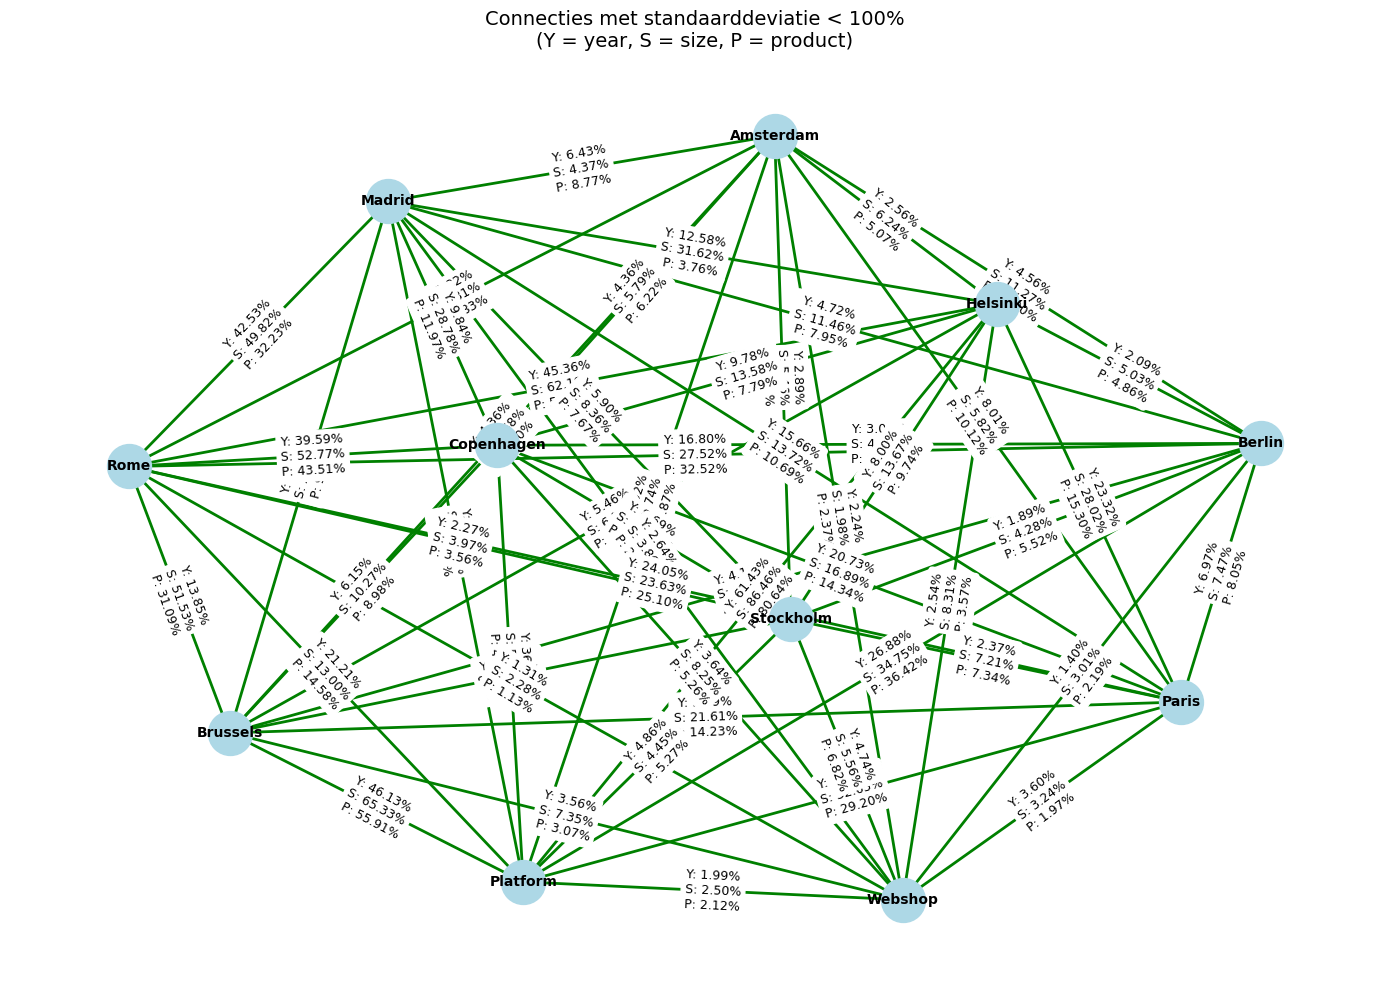

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

file_path = f"{YOUR_PERSONAL_PATH}/channel_mpe_avg_stdv.xlsx"
sheet_name = "Sheet1"

# === Data inlezen ===
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Strip '%' en vervang komma’s door punten → zet om naar float
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)

# Filter: alleen rijen waar alle drie de standaarddeviaties < drempel
filtered_channel = df[
    (df['Years_StdDev'] < std_dev_threshold_channel_network_visualisation) &
    (df['Products_StdDev'] < std_dev_threshold_channel_network_visualisation) &
    (df['Sizes_StdDev'] < std_dev_threshold_channel_network_visualisation)
]

# Extract edges en bijhorende labels met 3 std. dev's
edges = []
edge_labels = {}
for _, row in filtered_channel.iterrows():
    loc1, loc2 = row.iloc[0].split(" vs ")
    edges.append((loc1, loc2))
    label = (
        f"Y: {row['Years_StdDev']*100:.2f}%\n"
        f"S: {row['Products_StdDev']*100:.2f}%\n"
        f"P: {row['Sizes_StdDev']*100:.2f}%"
        
    )
    edge_labels[(loc1, loc2)] = label

# Unieke locaties
nodes = sorted(set([loc for edge in edges for loc in edge]))

# === Graaf tekenen ===
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color='green', width=2)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Teken standaarddeviaties op de lijnen
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title(f"Connecties met standaarddeviatie < {std_dev_threshold_channel_network_visualisation*100}%\n(Y = year, S = size, P = product)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


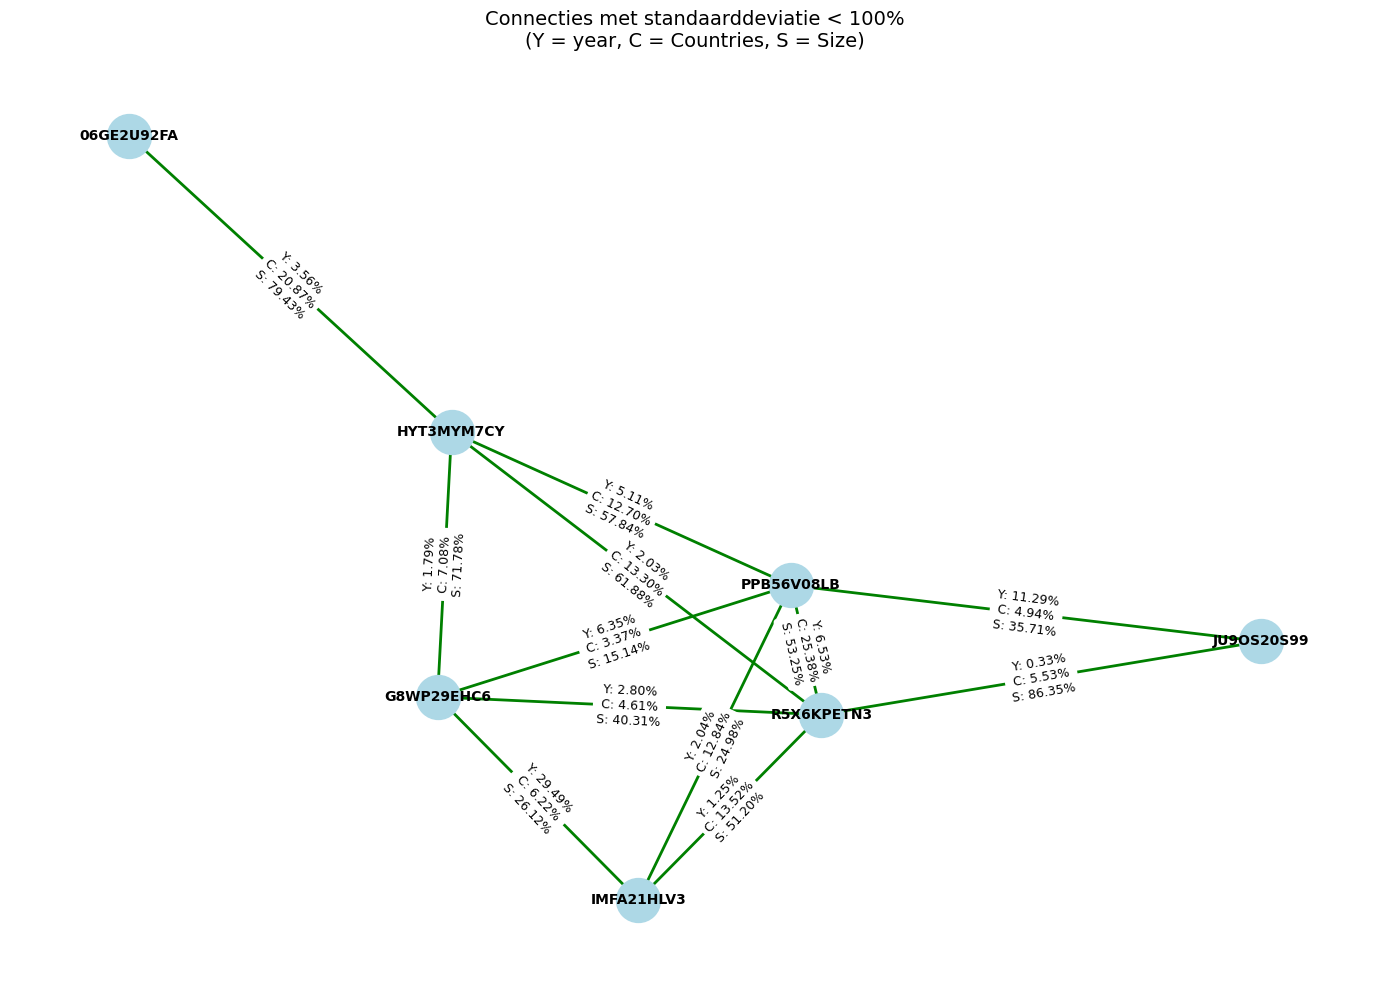

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# === PAD NAAR JOUW BESTAND (pas dit aan!) ===
file_path = f"{YOUR_PERSONAL_PATH}/product_mpe_avg_stdv.xlsx"
sheet_name = "Sheet1"

# === Data inlezen ===
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Strip '%' en vervang komma’s door punten → zet om naar float
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)

# Filter: alleen rijen waar alle drie de standaarddeviaties < drempel
filtered_product = df[
    (df['Years_StdDev'] < std_dev_threshold_product_network_visualisation) &
    (df['Countries_StdDev'] < std_dev_threshold_product_network_visualisation) &
    (df['Sizes_StdDev'] < std_dev_threshold_product_network_visualisation)
]

# Extract edges en bijhorende labels met 3 std. dev's
edges = []
edge_labels = {}
for _, row in filtered_product.iterrows():
    loc1, loc2 = row.iloc[0].split(" vs ")
    edges.append((loc1, loc2))
    label = (
        f"Y: {row['Years_StdDev']*100:.2f}%\n"
        f"C: {row['Countries_StdDev']*100:.2f}%\n"
        f"S: {row['Sizes_StdDev']*100:.2f}%"
        
    )
    edge_labels[(loc1, loc2)] = label

# Unieke locaties
nodes = sorted(set([loc for edge in edges for loc in edge]))

# === Graaf tekenen ===
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color='green', width=2)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Teken standaarddeviaties op de lijnen
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title(f"Connecties met standaarddeviatie < {std_dev_threshold_product_network_visualisation*100}%\n(Y = year, C = Countries, S = Size)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


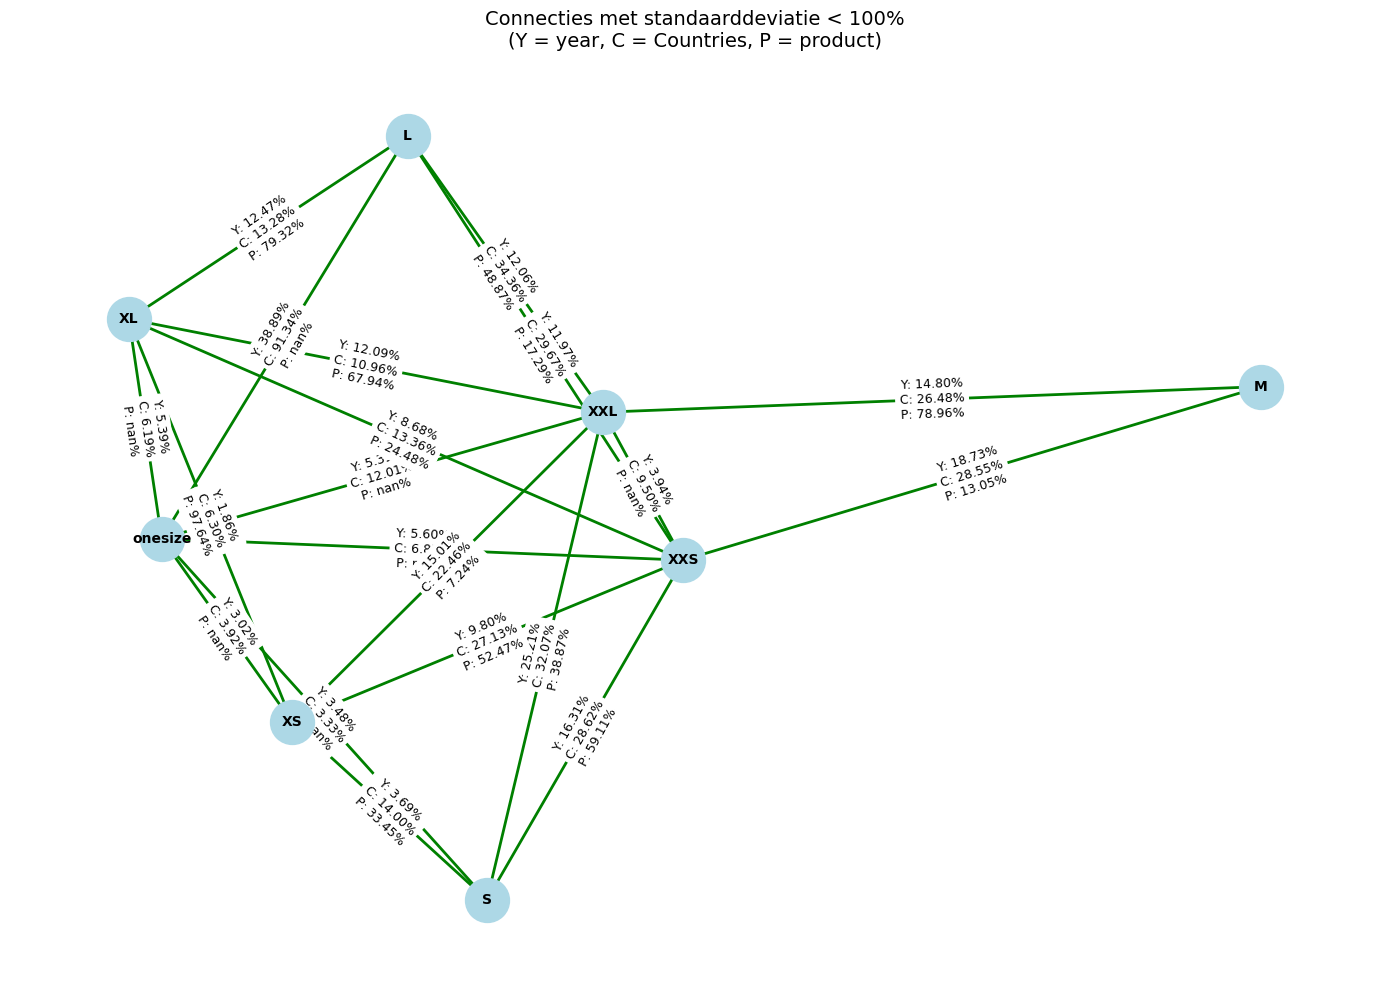

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# === PAD NAAR JOUW BESTAND (pas dit aan!) ===
file_path = f"{YOUR_PERSONAL_PATH}/size_mpe_avg_stdv.xlsx"
sheet_name = "Sheet1"

# === Data inlezen ===
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Strip '%' en vervang komma’s door punten → zet om naar float
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)

# Filter: alleen rijen waar alle drie de standaarddeviaties < drempel

stddev_cols = ['Years_StdDev', 'Countries_StdDev', 'Products_StdDev']

filtered_size = df[
    df[stddev_cols].apply(lambda x: (x.dropna() < std_dev_threshold_size_network_visualisation).all(), axis=1)
]


# Extract edges en bijhorende labels met 3 std. dev's
edges = []
edge_labels = {}
for _, row in filtered_size.iterrows():
    loc1, loc2 = row.iloc[0].split(" vs ")
    edges.append((loc1, loc2))
    label = (
        f"Y: {row['Years_StdDev']*100:.2f}%\n"
        f"C: {row['Countries_StdDev']*100:.2f}%\n"
        f"P: {row['Products_StdDev']*100:.2f}%"
        
    )
    edge_labels[(loc1, loc2)] = label

# Unieke locaties
nodes = sorted(set([loc for edge in edges for loc in edge]))

# === Graaf tekenen ===
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color='green', width=2)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Teken standaarddeviaties op de lijnen
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title(f"Connecties met standaarddeviatie < {std_dev_threshold_size_network_visualisation*100}%\n(Y = year, C = Countries, P = product)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


STEP 4 aggregate over the chosen topics

In [ ]:
# code moet hier nog komen die dan da demand wegschrijft naar een excel

In [16]:
#km afstand, full connection, var treshold
import pandas as pd
import numpy as np
import networkx as nx
import os
import itertools
import math

# === 1. Zet hoofdpad en inputbestanden centraal ===

input_path = f"{YOUR_PERSONAL_PATH}/Real_Demand_code_input.xlsx"
size_merge_info_path = f"{YOUR_PERSONAL_PATH}/size_mpe_avg_stdv.xlsx"
product_merge_info_path = f"{YOUR_PERSONAL_PATH}/product_mpe_avg_stdv.xlsx"
channel_merge_info_path = f"{YOUR_PERSONAL_PATH}/channel_mpe_avg_stdv.xlsx"
channel_coordinates_path = f"{YOUR_PERSONAL_PATH}/Channel_Coordinates.xlsx"

# treshholds en ture/false connection in het begin bepaald

# === 4. Data inladen ===
df_real = pd.read_excel(input_path, sheet_name="Sheet1")
df_size_info = pd.read_excel(size_merge_info_path, sheet_name="Sheet1")
df_product_info = pd.read_excel(product_merge_info_path, sheet_name="Sheet1")
df_channel_info = pd.read_excel(channel_merge_info_path, sheet_name="Sheet1")
df_channel_coords = pd.read_excel(channel_coordinates_path)

# Maak mapping voor coördinaten
channel_coords = df_channel_coords.set_index('Channel_id')[['x_coor', 'y_coor']].to_dict('index')

# === 5. Haversine functie voor afstand in kilometers ===
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Straal van de aarde in km
    lat1_rad, lon1_rad = math.radians(lat1), math.radians(lon1)
    lat2_rad, lon2_rad = math.radians(lat2), math.radians(lon2)
    
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    distance_km = R * c
    return distance_km

# === 6. Helperfunctie om links in te laden ===
def load_links(df_info, type_label, threshold, coords=None, distance_threshold=None):
    links = []
    for col in df_info.columns[1:]:
        df_info[col] = df_info[col].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)
    
    if type_label == 'size':
        ignore_std = 'Sizes_StdDev'
    elif type_label == 'product':
        ignore_std = 'Products_StdDev'
    elif type_label == 'channel':
        ignore_std = 'Countries_StdDev'
    else:
        raise ValueError("Unknown type label")

    
                
    all_stddev_cols = ['Years_StdDev', 'Countries_StdDev', 'Products_StdDev', 'Sizes_StdDev']
    filter_cols = [c for c in all_stddev_cols if c != ignore_std]
    condition = df_info[filter_cols].apply(lambda x: (x.dropna() < threshold).all(), axis=1)


    filtered = df_info[condition]

    for row in filtered.itertuples():
        item1, item2 = row._1.split(' vs ')
        item1 = item1.strip()
        item2 = item2.strip()

        if type_label == 'channel' and coords is not None and distance_threshold is not None:
            if item1 not in coords or item2 not in coords:
                continue

            # Haal lat/lon
            lat1, lon1 = coords[item1]['x_coor'], coords[item1]['y_coor']
            lat2, lon2 = coords[item2]['x_coor'], coords[item2]['y_coor']
            
            # Bereken afstand in km
            distance = haversine(lat1, lon1, lat2, lon2)

            if distance > distance_threshold:
                continue  # Te ver, niet linken

        links.append((item1, item2, type_label))
    
    return links

# === 7. Alle links apart inladen ===
size_links = load_links(df_size_info, 'size', std_dev_threshold_size)
product_links = load_links(df_product_info, 'product', std_dev_threshold_product)
channel_links = load_links(df_channel_info, 'channel', std_dev_threshold_channel,
                           coords=channel_coords, distance_threshold=distance_threshold_channel)

# Combineer alles
all_links = size_links + product_links + channel_links

# === 8. Grafiek bouwen ===
G = nx.Graph()

for item1, item2, type_label in all_links:
    G.add_node(item1, type=type_label)
    G.add_node(item2, type=type_label)
    G.add_edge(item1, item2)

# === 9. Connected components vinden ===
clusters = list(nx.connected_components(G))
print(f"Aantal clusters gevonden: {len(clusters)}")

# === 10. Full Connection binnen clusters (OPTIONEEL) ===
if full_connection:
    for cluster in clusters:
        for item1, item2 in itertools.combinations(cluster, 2):
            G.add_edge(item1, item2)

# === 11. Merge mapping maken ===
merge_mapping = {}
for cluster in clusters:
    sorted_elements = sorted(list(cluster))
    merged_name = "merged_" + "_".join(sorted_elements)
    for element in cluster:
        merge_mapping[element] = merged_name

print(f"Aantal unieke elementen in mapping: {len(merge_mapping)}")

# === 12. Merge toepassing op real demand data ===
df_real_copy = df_real.copy()

entity_columns = ['size', 'product_id', 'channel_id']

for col in entity_columns:
    df_real_copy[col] = df_real_copy[col].apply(lambda x: merge_mapping[x] if x in merge_mapping else x)

# === 13. Nu echte merging uitvoeren ===
group_cols = ['product_id', 'channel_id', 'season', 'size']

df_merged = df_real_copy.groupby(group_cols).agg(
    real_demand=('real demand', 'sum')
).reset_index()

# === 14. Percentages berekenen per originele waarde ===
ratios_records = []

reverse_mapping = {}
for original, merged in merge_mapping.items():
    reverse_mapping.setdefault(merged, []).append(original)

for merged_name, originals in reverse_mapping.items():
    for idx, original in enumerate(originals):
        subset = df_real[
            (df_real['size'] == original) |
            (df_real['product_id'] == original) |
            (df_real['channel_id'] == original)
        ]
        if subset.empty:
            continue

        for _, row in subset.iterrows():
            merged_row = df_merged[
                (df_merged['size'] == merge_mapping.get(row['size'], row['size'])) &
                (df_merged['product_id'] == merge_mapping.get(row['product_id'], row['product_id'])) &
                (df_merged['channel_id'] == merge_mapping.get(row['channel_id'], row['channel_id'])) &
                (df_merged['season'] == row['season'])
            ]

            if not merged_row.empty:
                total_real_demand = merged_row['real_demand'].values[0]
                if total_real_demand != 0:
                    percentage = row['real demand'] / total_real_demand
                else:
                    percentage = np.nan

                ratios_records.append({
                    'merged_name': merged_name,
                    'original_element': original,
                    'product_id': row['product_id'],
                    'channel_id': row['channel_id'],
                    'season': row['season'],
                    'size': row['size'],
                    'original_real_demand': row['real demand'],
                    'merged_real_demand': total_real_demand,
                    'percentage_of_merged': percentage
                })

# === 15. Wegschrijven naar Excel ===
output_merged_path = f"{YOUR_PERSONAL_PATH}/Real_Demand_merged_output.xlsx"
output_ratios_path = f"{YOUR_PERSONAL_PATH}/Merge_Ratios.xlsx"

df_merged.to_excel(output_merged_path, index=False)
pd.DataFrame(ratios_records).to_excel(output_ratios_path, index=False)

print("Volledige merging MET echte kilometers én optionele volledige clusterverbinding afgerond!")


Aantal clusters gevonden: 3
Aantal unieke elementen in mapping: 28
Volledige merging MET echte kilometers én optionele volledige clusterverbinding afgerond!


STEP 5 FORECAST

MOVING AVERAGE

VOORSPELLEN VAN DE MOVING AVERAGE 2024

In [ ]:
import pandas as pd
import os

# === 2. Bestanden en folders ===
input_path = f"{YOUR_PERSONAL_PATH}/Real_Demand_merged_output.xlsx"
sheet_name = "Sheet1"
output_forecasts_folder = f"{YOUR_PERSONAL_PATH}/Forecasts_By_Window"

# Maak de outputmap aan als die niet bestaat
os.makedirs(output_forecasts_folder, exist_ok=True)

# === 3. Data inladen ===
df = pd.read_excel(input_path, sheet_name=sheet_name)

# === 4. Kolomnamen goed zetten ===
df = df.rename(columns={'season': 'year'})  # mocht nog nodig zijn
expected_columns = ['product_id', 'channel_id', 'year', 'size', 'real_demand']
assert all(col in df.columns for col in expected_columns), f"Ontbrekende kolommen: {df.columns}"

# === 5. Sorteer op jaar ===
df = df.sort_values(by='year')

# === 6. Bepaal hoeveel jaren per combinatie ===
year_counts = df.groupby(['product_id', 'size', 'channel_id'])['year'].nunique().reset_index()
year_counts = year_counts.rename(columns={'year': 'max_years'})

# Merge max_years terug naar hoofddataframe
df = df.merge(year_counts, on=['product_id', 'size', 'channel_id'], how='left')

# === 7. Rolling forecast berekenen per combinatie ===
all_window_dfs = dict()

for _, row in year_counts.iterrows():
    product = row['product_id']
    size = row['size']
    channel = row['channel_id']
    max_years = row['max_years']
    
    sub_df = df[
        (df['product_id'] == product) &
        (df['size'] == size) &
        (df['channel_id'] == channel)
    ].copy()
    
    sub_df = sub_df.sort_values(by='year')
    
    for window in range(1, max_years + 1):
        sub_df[f'ma_{window}'] = sub_df['real_demand'].rolling(window=window, min_periods=1).mean()
        forecast_row = sub_df.tail(1).copy()

        # === Belangrijk: VOEG 1 JAAR TOE voor echte forecast ===
        forecast_row['year'] = forecast_row['year'] + 1
        forecast_row['window'] = window
        forecast_row['forecast'] = forecast_row[f'ma_{window}']

        # Enkel de relevante kolommen bewaren
        forecast_row = forecast_row[['product_id', 'size', 'channel_id', 'year', 'forecast']]
        
        if window not in all_window_dfs:
            all_window_dfs[window] = []
        all_window_dfs[window].append(forecast_row)

# === 8. Wegschrijven naar Excel ===
for window, dfs in all_window_dfs.items():
    result_df = pd.concat(dfs, ignore_index=True)
    output_path = os.path.join(output_forecasts_folder, f"Forecast_Window_{window}.xlsx")
    result_df.to_excel(output_path, index=False)

print(f"✅ Alle forecasts per window zijn succesvol opgeslagen in: {output_forecasts_folder}")


✅ Alle forecasts per window zijn succesvol opgeslagen in: /Users/biekeleenknegt/Documents/Github/SCM_GW/Forecasts_By_Window


MAPE EN APE VAN DE MOVING AVERAGE METHODE OP 2023

In [ ]:
# === 2. Bestanden en folders ===
input_path = f"{YOUR_PERSONAL_PATH}/Real_Demand_merged_output.xlsx"
sheet_name = "Sheet1"
output_forecasts_folder = f"{YOUR_PERSONAL_PATH}/Forecasts_Validation"

# Maak de outputmap aan als die niet bestaat
os.makedirs(output_forecasts_folder, exist_ok=True)

# === 3. Data inladen ===
df = pd.read_excel(input_path, sheet_name=sheet_name)
df = df.rename(columns={'season': 'year'})  # indien nodig

# Kolommen check
expected_columns = ['product_id', 'channel_id', 'year', 'size', 'real_demand']
assert all(col in df.columns for col in expected_columns), f"Ontbrekende kolommen: {df.columns}"

# === 4. Data splitsen: training (tot 2022) vs echte 2023 ===
df_train = df[df['year'] < 2023].copy()
df_real_2023 = df[df['year'] == 2023].copy()

# === 5. Bepaal hoeveel jaren per combinatie beschikbaar zijn ===
year_counts = df_train.groupby(['product_id', 'size', 'channel_id'])['year'].nunique().reset_index()
year_counts = year_counts.rename(columns={'year': 'max_years'})

df_train = df_train.merge(year_counts, on=['product_id', 'size', 'channel_id'], how='left')

# === 6. Rolling forecasts maken per window size ===
forecast_records = []

for _, row in year_counts.iterrows():
    product = row['product_id']
    size = row['size']
    channel = row['channel_id']
    max_years = row['max_years']
    
    sub_df = df_train[
        (df_train['product_id'] == product) &
        (df_train['size'] == size) &
        (df_train['channel_id'] == channel)
    ].copy()
    
    sub_df = sub_df.sort_values(by='year')
    
    if sub_df.empty:
        continue
    
    for window in range(1, max_years + 1):
        sub_df[f'ma_{window}'] = sub_df['real_demand'].rolling(window=window, min_periods=1).mean()
        forecast_value = sub_df.tail(1)[f'ma_{window}'].values[0]
        
        forecast_records.append({
            'product_id': product,
            'size': size,
            'channel_id': channel,
            'window': window,
            'forecast_year': 2023,
            'forecast': forecast_value
        })

# === 7. Forecasts per window vergelijken met echte 2023 waarden ===
df_forecast = pd.DataFrame(forecast_records)

# Merge forecast en echte waarde
df_validation = df_forecast.merge(
    df_real_2023[['product_id', 'size', 'channel_id', 'year', 'real_demand']],
    left_on=['product_id', 'size', 'channel_id'],
    right_on=['product_id', 'size', 'channel_id'],
    how='inner'
)

df_validation = df_validation.rename(columns={'real_demand': 'actual'})

# === 8. MAPE en MPE per window berekenen ===
# Bereken absolute percentage error en percentage error
df_validation['APE'] = np.abs((df_validation['actual'] - df_validation['forecast']) / df_validation['actual'])
df_validation['PE'] = (df_validation['forecast'] - df_validation['actual']) / df_validation['actual']

# Groepeer per window
mape_mpe_per_window = df_validation.groupby('window').agg(
    MAPE=('APE', lambda x: np.mean(x) * 100),
    MPE=('PE', lambda x: np.mean(x) * 100)
).reset_index()

# Toon resultaten
print(f"✅ Validatie per window klaar:")
print(mape_mpe_per_window)

# === 9. Resultaten wegschrijven ===
validation_forecasts_path = os.path.join(output_forecasts_folder, "Validation_Forecasts_2023.xlsx")
mape_mpe_path = os.path.join(output_forecasts_folder, "Validation_MAPE_MPE_per_window.xlsx")

df_validation.to_excel(validation_forecasts_path, index=False)
mape_mpe_per_window.to_excel(mape_mpe_path, index=False)

print(f"✅ Forecasts en MAPE/MPE per window opgeslagen in: {output_forecasts_folder}")


✅ Validatie per window klaar:
   window       MAPE        MPE
0       1  24.679945  17.862938
1       2  31.348589  20.028212
2       3  31.483905  18.986485
3       4  31.975648  20.104597
✅ Forecasts en MAPE/MPE per window opgeslagen in: /Users/biekeleenknegt/Documents/Github/SCM_GW/Forecasts_Validation


WE GAAN VERDER GAAN MET DE WINDOW DUS DE SPLITSING VAN DEGENE MET DE BESTE MAPE

OPSPLITSING VAN DE OUTPUT VAN FORECAST

In [ ]:
import pandas as pd
import os

# === 1. Zet hoofdpad centraal ===

# === 2. Bestanden definiëren ===
forecast_input_path = f"{YOUR_PERSONAL_PATH}/Forecasts_By_Window/Forecast_Window_5.xlsx" # DIT HIER AANPASSEN
ratios_path = f"{YOUR_PERSONAL_PATH}/Merge_Ratios.xlsx"
output_split_path = f"{YOUR_PERSONAL_PATH}/Forecasts_By_Window/Forecast_Window_5_Split_CORRECT_MEAN.xlsx" # DIT HIER AANPASSEN

# === 3. Data inladen ===
df_forecast = pd.read_excel(forecast_input_path)
df_ratios = pd.read_excel(ratios_path)

# Controle op kolommen
expected_forecast_cols = ['product_id', 'size', 'channel_id', 'year', 'forecast']
assert all(col in df_forecast.columns for col in expected_forecast_cols), f"Forecast kolomnamen kloppen niet: {df_forecast.columns}"

expected_ratio_cols = ['merged_name', 'original_element', 'product_id', 'channel_id', 'season', 'size', 'percentage_of_merged']
assert all(col in df_ratios.columns for col in expected_ratio_cols), f"Ratio kolomnamen kloppen niet: {df_ratios.columns}"

# === 4. Forecasts splitsen ===
split_forecasts = []

for idx, row in df_forecast.iterrows():
    product_id = row['product_id']
    size = row['size']
    merged_channel_id = row['channel_id']  # opgelet: dit is een merged naam!
    year = row['year']
    forecast_value = row['forecast']

    # Zoek matching records (zonder beperking op seizoen!)
    matched_rows = df_ratios[
        (df_ratios['merged_name'] == merged_channel_id) &
        (df_ratios['product_id'] == product_id) &
        (df_ratios['size'] == size)
    ]

    if matched_rows.empty:
        # Geen split nodig, forecast behouden
        split_forecasts.append({
            'product_id': product_id,
            'channel_id': merged_channel_id,
            'size': size,
            'year': year,
            'forecast': forecast_value
        })
    else:
        # Gemiddelde percentage berekenen per originele combinatie
        grouped = matched_rows.groupby(['original_element', 'product_id', 'channel_id', 'size']).agg(
            mean_percentage=('percentage_of_merged', 'mean')
        ).reset_index()

        for _, split_row in grouped.iterrows():
            original_product = split_row['product_id']
            original_channel = split_row['channel_id']
            original_size = split_row['size']
            mean_percentage = split_row['mean_percentage']

            if pd.isna(mean_percentage):
                mean_percentage = 1.0  # fallback als percentage ontbreekt

            split_forecasts.append({
                'product_id': original_product,
                'channel_id': original_channel,
                'size': original_size,
                'year': year,
                'forecast': forecast_value * mean_percentage
            })

# === 5. Nieuwe gesplitste forecast dataset maken ===
df_split_forecasts = pd.DataFrame(split_forecasts)

# === 6. Wegschrijven naar Excel ===
df_split_forecasts.to_excel(output_split_path, index=False)

print(f"✅ Forecast opgesplitst met gemiddelde percentages en opgeslagen naar: {output_split_path}")


✅ Forecast opgesplitst met gemiddelde percentages en opgeslagen naar: /Users/biekeleenknegt/Documents/Github/SCM_GW/Forecasts_By_Window/Forecast_Window_5_Split_CORRECT_MEAN.xlsx


HOLT

In [ ]:
stop

NameError: name 'stop' is not defined

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import Holt


# === Pad en sheetnaam ===
file_path1 = f"{YOUR_PERSONAL_PATH}/Real_Demand_merged_output.xlsx"

#file_path1 = "//content//drive//My Drive//Social Networks//Real_Demand_merged_output.xlsx"
df = pd.read_excel(file_path1)

df = df.rename(columns={'season': 'year', 'real_demand': 'demand'})
expected_cols = ['product_id', 'channel_id', 'year', 'size', 'demand']
assert all(c in df.columns for c in expected_cols), f"Ontbrekende kolommen: {df.columns}"

# Sorteer op jaar
df = df.sort_values(by='year')

# === 5. Trainingsdata 2019-2023 ===
train_df = df.query("2019 <= year <= 2023").copy()

# === 6. Pass 1 – optimale αᵢ & βᵢ per reeks (voor globaal gemiddelde) ===
alphas, betas = [], []
for (_, _, _), grp in train_df.groupby(['product_id', 'channel_id', 'size']):
    if grp['year'].nunique() < 3:                     # Holt heeft ≥3 punten
        continue
    y = pd.Series(grp['demand'].values, index=grp['year'])
    fit = Holt(y, initialization_method="legacy-heuristic").fit(optimized=True)
    alphas.append(fit.params['smoothing_level'])
    betas.append( fit.params['smoothing_trend'])

global_alpha = sum(alphas) / len(alphas)
global_beta  = sum(betas)  / len(betas)
print(f"Globale α = {global_alpha:.4f} , β = {global_beta:.4f}")

# === 7. Pass 2 – forecast 2024 met dezelfde α & β ===
rows = []
for (prod, chan, size), grp in train_df.groupby(['product_id', 'channel_id', 'size']):
    if grp['year'].nunique() < 3:
        continue
    y = pd.Series(grp['demand'].values, index=grp['year'])
    fit = Holt(y, initialization_method="legacy-heuristic").fit(
            smoothing_level = global_alpha,
            smoothing_trend = global_beta,
            optimized       = False)

    fc_2024 = fit.forecast(steps = 2024 - y.index.max()).iloc[-1]
    rows.append({
        "product_id": prod,
        "size"      : size,               # volgorde gelijk aan MA-output
        "channel_id": chan,
        "year"      : 2024,
        "forecast"  : fc_2024,
        "alpha"     : global_alpha,
        "beta"      : global_beta
    })

out_df = pd.DataFrame(rows)[   # kolommen in gewenste volgorde
    ["product_id", "size", "channel_id", "year", "forecast", "alpha", "beta"]
]


#wegschrijven

out = pd.DataFrame(rows)
out_file = "holt_forecast_2024_by_channel_product_size.xlsx"
out.to_excel(out_file, index=False)

print(f"✅ Forecast opgeslagen naar: {out_file}")


FileNotFoundError: [Errno 2] No such file or directory: 'bestand.xlsx'

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import Holt

# === Pad en sheetnaam ===
file_path1 = f"{YOUR_PERSONAL_PATH}/Real_Demand_merged_output.xlsx"


df = pd.read_excel(file_path1)

df = df.rename(columns={'season': 'year', 'real_demand': 'demand'})
expected_cols = ['product_id', 'channel_id', 'year', 'size', 'demand']
assert all(c in df.columns for c in expected_cols), f"Ontbrekende kolommen: {df.columns}"

# Sorteer op jaar
df = df.sort_values(by='year')

# === 5. Trainingsdata 2019-2022 ===
train_df = df.query("2019 <= year <= 2022").copy()

# === 6. Pass 1 – optimale αᵢ & βᵢ per reeks (voor globaal gemiddelde) ===
alphas, betas = [], []
for (_, _, _), grp in train_df.groupby(['product_id', 'channel_id', 'size']):
    if grp['year'].nunique() < 3:                     # Holt heeft ≥3 punten
        continue
    y = pd.Series(grp['demand'].values, index=grp['year'])
    fit = Holt(y, initialization_method="legacy-heuristic").fit(optimized=True)
    alphas.append(fit.params['smoothing_level'])
    betas.append( fit.params['smoothing_trend'])

global_alpha = sum(alphas) / len(alphas)
global_beta  = sum(betas)  / len(betas)
print(f"Globale α = {global_alpha:.4f} , β = {global_beta:.4f}")

# === 7. Pass 2 – forecast 2023 met dezelfde α & β ===
rows = []
for (prod, chan, size), grp in train_df.groupby(['product_id', 'channel_id', 'size']):
    if grp['year'].nunique() < 3:
        continue
    y = pd.Series(grp['demand'].values, index=grp['year'])
    fit = Holt(y, initialization_method="legacy-heuristic").fit(
            smoothing_level = global_alpha,
            smoothing_trend = global_beta,
            optimized       = False)

    fc_2023 = fit.forecast(steps = 2023 - y.index.max()).iloc[-1]
    rows.append({
        "product_id": prod,
        "size"      : size,               # volgorde gelijk aan MA-output
        "channel_id": chan,
        "year"      : 2023,
        "forecast"  : fc_2023,
        "alpha"     : global_alpha,
        "beta"      : global_beta
    })

out_df = pd.DataFrame(rows)[   # kolommen in gewenste volgorde
    ["product_id", "size", "channel_id", "year", "forecast", "alpha", "beta"]
]

#wegschrijven

out = pd.DataFrame(rows)
out_file = "holt_forecast_2023_by_channel_product_size.xlsx"
out.to_excel(out_file, index=False)

print(f"✅ Forecast opgeslagen naar: {out_file}")

EXPONENTIAL SMOOTHING

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from pathlib import Path
import os



# === Pad en sheetnaam ===
file_path1 = f"{YOUR_PERSONAL_PATH}/Real_Demand_merged_output.xlsx"


df = df.rename(columns={'season': 'year', 'real_demand': 'demand'})
expected_cols = ['product_id', 'channel_id', 'year', 'size', 'demand']
assert all(c in df.columns for c in expected_cols), f"Ontbrekende kolommen: {df.columns}"

df = df.sort_values(by='year')

# === 4. Trainingsdata 2019-2023 ===
train_df = df.query("2019 <= year <= 2023").copy()

# === 5. Pass 1 – optimale αᵢ per reeks (voor globaal gemiddelde) ===
alphas = []
for (_, _, _), grp in train_df.groupby(['product_id', 'channel_id', 'size']):
    if grp['year'].nunique() < 2:               # SES vereist ≥2 punten
        continue
    y = pd.Series(grp['demand'].values, index=grp['year'])
    fit = SimpleExpSmoothing(
            y, initialization_method="legacy-heuristic"
          ).fit(optimized=True)
    alphas.append(fit.params['smoothing_level'])

global_alpha = sum(alphas) / len(alphas)
print(f"🌍  Globale α = {global_alpha:.4f}")

# === 6. Pass 2 – forecast 2024 met dezelfde α ===
rows = []
for (prod, chan, size), grp in train_df.groupby(['product_id', 'channel_id', 'size']):
    if grp['year'].nunique() < 2:
        continue
    y = pd.Series(grp['demand'].values, index=grp['year'])
    fit = SimpleExpSmoothing(
            y, initialization_method="legacy-heuristic"
          ).fit(smoothing_level=global_alpha, optimized=False)

    fc_2024 = fit.forecast(steps=2024 - y.index.max()).iloc[-1]

    rows.append({
        "product_id": prod,
        "size"      : size,
        "channel_id": chan,
        "year"      : 2024,
        "forecast"  : fc_2024,
        "alpha"     : global_alpha
    })

out_df = pd.DataFrame(rows)[
    ["product_id", "size", "channel_id", "year", "forecast", "alpha"]
]

# Excel wegschrijven
out = pd.DataFrame(rows)
out_file = "ses_forecast_2024_by_channel_product_size.xlsx"
out.to_excel(out_file, index=False)

print(f"✅ Forecast opgeslagen naar: {out_file}")



In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from pathlib import Path
import os



# === Pad en sheetnaam ===
file_path1 = f"{YOUR_PERSONAL_PATH}/Real_Demand_merged_output.xlsx"


df = df.rename(columns={'season': 'year', 'real_demand': 'demand'})
expected_cols = ['product_id', 'channel_id', 'year', 'size', 'demand']
assert all(c in df.columns for c in expected_cols), f"Ontbrekende kolommen: {df.columns}"

df = df.sort_values(by='year')

# === 4. Trainingsdata 2019-2022 ===
train_df = df.query("2019 <= year <= 2022").copy()

# === 5. Pass 1 – optimale αᵢ per reeks (voor globaal gemiddelde) ===
alphas = []
for (_, _, _), grp in train_df.groupby(['product_id', 'channel_id', 'size']):
    if grp['year'].nunique() < 2:               # SES vereist ≥2 punten
        continue
    y = pd.Series(grp['demand'].values, index=grp['year'])
    fit = SimpleExpSmoothing(
            y, initialization_method="legacy-heuristic"
          ).fit(optimized=True)
    alphas.append(fit.params['smoothing_level'])

global_alpha = sum(alphas) / len(alphas)
print(f"🌍  Globale α = {global_alpha:.4f}")

# === 6. Pass 2 – forecast 2023 met dezelfde α ===
rows = []
for (prod, chan, size), grp in train_df.groupby(['product_id', 'channel_id', 'size']):
    if grp['year'].nunique() < 2:
        continue
    y = pd.Series(grp['demand'].values, index=grp['year'])
    fit = SimpleExpSmoothing(
            y, initialization_method="legacy-heuristic"
          ).fit(smoothing_level=global_alpha, optimized=False)

    fc_2023 = fit.forecast(steps=2023 - y.index.max()).iloc[-1]

    rows.append({
        "product_id": prod,
        "size"      : size,
        "channel_id": chan,
        "year"      : 2023,
        "forecast"  : fc_2023,
        "alpha"     : global_alpha
    })

out_df = pd.DataFrame(rows)[
    ["product_id", "size", "channel_id", "year", "forecast", "alpha"]
]



# Excel wegschrijven
out = pd.DataFrame(rows)
out_file = "ses_forecast_2023_by_channel_product_size.xlsx"
out.to_excel(out_file, index=False)

print(f"✅ Forecast opgeslagen naar: {out_file}")


EXPONENTIAL SMOOTHING

In [ ]:
#HIER NOG PLAKKEN KRIJG ERROR BIJ MIJ